# Perform Exploratory Data Analysis (on train data)

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the training data
df = pd.read_csv('/home/xaris/Desktop/Projects/Introvert & Extrovert/Introvert-vs-Extrovert/Datasets/train.csv')
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [3]:
# Id is not giving any further information so i 'll drop it
df = df.drop('id',axis = 1)

In [4]:
df.shape

(18524, 8)

In [5]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

# Univariate Analysis

Target Class Balance (Personality)

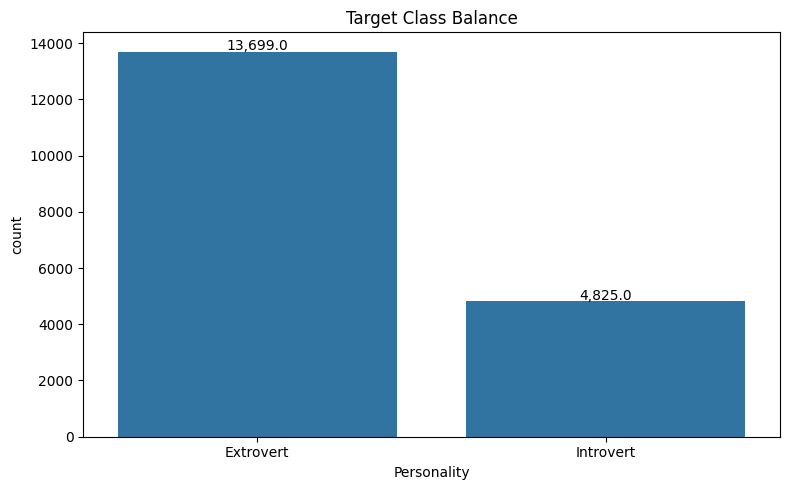

Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64


In [9]:
# Plot the distribution between extroverts and introverts (in training dataset)
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df, x="Personality", ax=ax)
ax.set_title("Target Class Balance")
for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", (p.get_x()+.40, p.get_height()+50), ha="center")
plt.tight_layout()
plt.show()

print(df["Personality"].value_counts(normalize=True).rename("proportion"))

The target data are imbalanced we should implement a strategy to fix this issue.

# Categorical Data

/tmp/ipykernel_199244/2008816161.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_feature, data=df, ax=axes[i], palette="viridis")
/tmp/ipykernel_199244/2008816161.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_feature, data=df, ax=axes[i], palette="viridis")


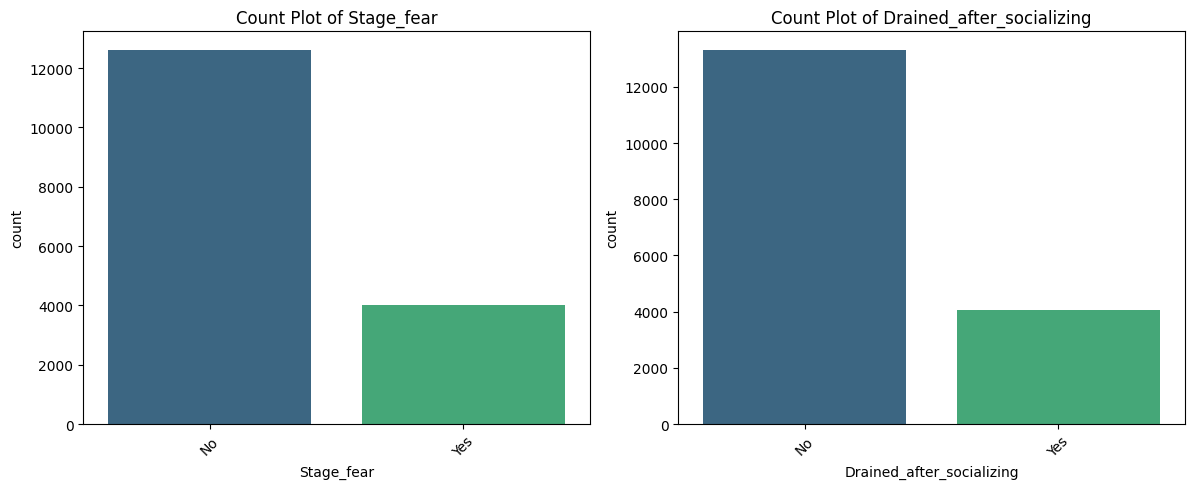

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot only the categorical variables 
# Drop the dependent variable
filtered_features = df.drop('Personality', axis=1)

# Select only categorical features (non-numeric)
cat_features = filtered_features.select_dtypes(exclude='number').columns
n_features = len(cat_features)
plots_per_row = 3

# Setup subplots
fig, axes = plt.subplots(
    nrows=(n_features // plots_per_row) + 1,
    ncols=plots_per_row,
    figsize=(18, ((n_features // plots_per_row) + 1) * 5)
)

# flatten axes for easy iteration (it is easier to loop over all of these axes)
axes = axes.flatten()

# Loop through categorical features and plot count plots
for i, cat_feature in enumerate(cat_features):
    sns.countplot(x=cat_feature, data=df, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Count Plot of {cat_feature}", fontsize=12)
    axes[i].tick_params(axis="x", rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

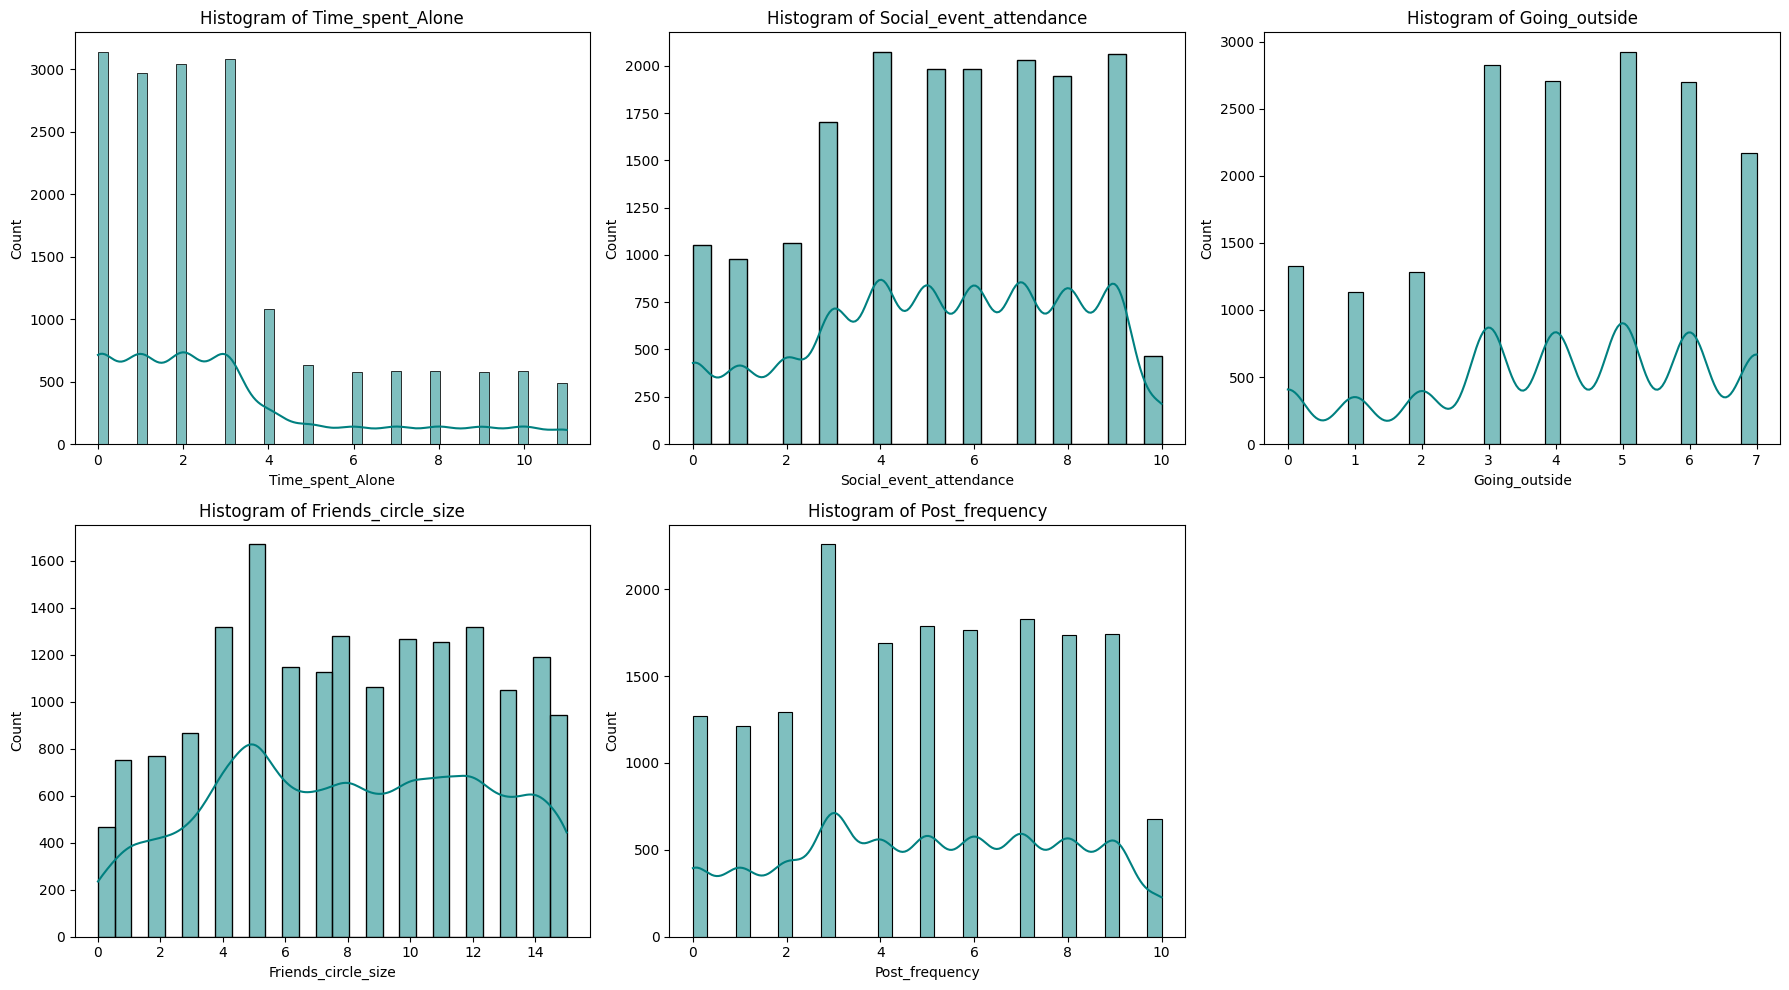

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

col_plot = ['Time_spent_Alone', 'Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
# Separate numeric features
n_features = len(col_plot)
plots_per_row = 3

# Setup subplots
fig, axes = plt.subplots(
    nrows=(n_features // plots_per_row) + 1,
    ncols=plots_per_row,
    figsize=(18, ((n_features // plots_per_row) + 1) * 5)
)
axes = axes.flatten()

# Loop through numeric features and plot histograms
for i, col in enumerate(col_plot):
    sns.histplot(df[col], ax=axes[i],kde = True, color='teal')
    axes[i].set_title(f"Histogram of {col}", fontsize=12)
    
# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

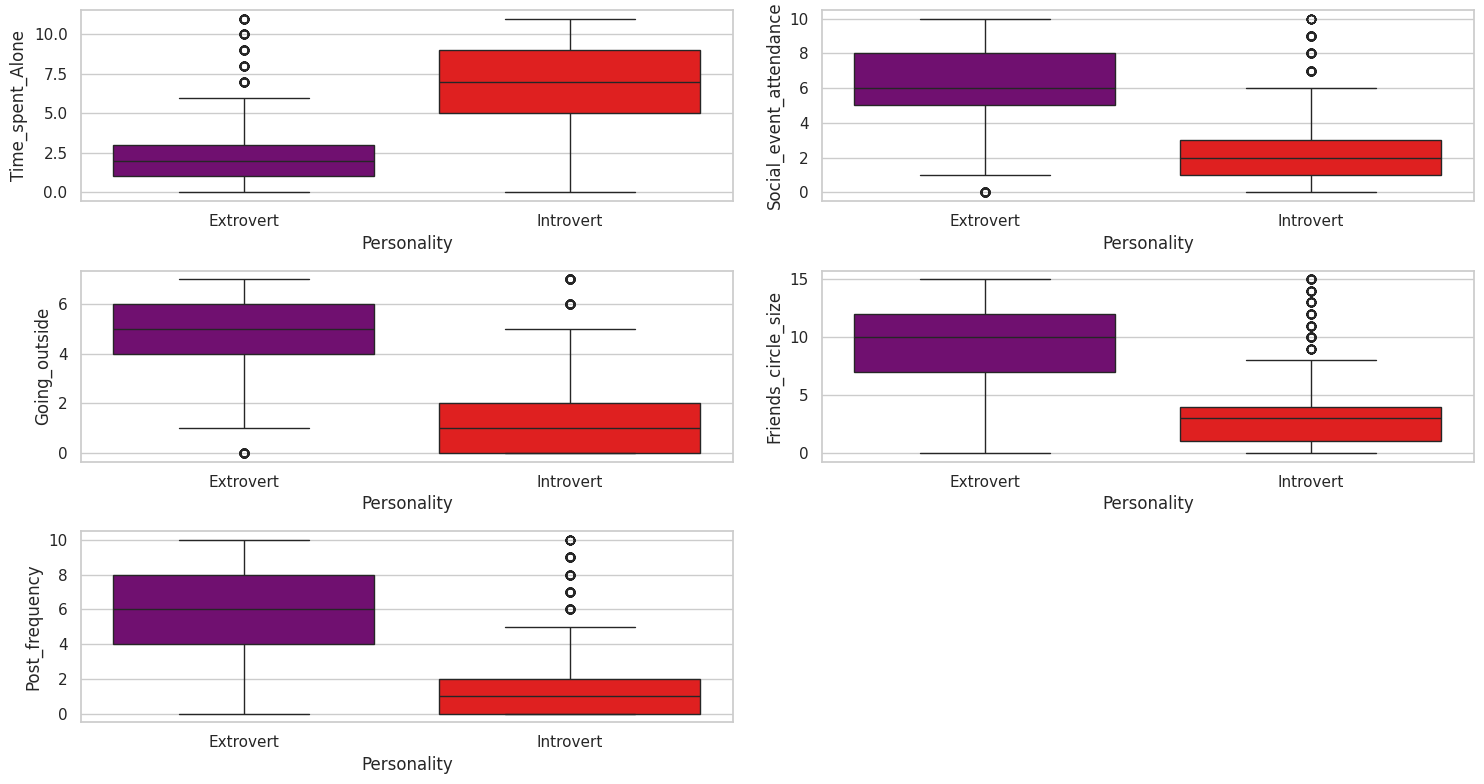

In [ ]:
# Numeric feature distributions by dependent variable (introvert/extrovert). Checking the outliers.
plt.figure(figsize=(15, 8))
col_plot = ['Time_spent_Alone', 'Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
colors  = ["purple","red"]

for i, col in enumerate(col_plot, 1): 
    plt.subplot(3, 2, i) # i is used to pick the position of current plots

    sns.boxplot(y= col, x='Personality', data=df,patch_artist=True,palette=colors) 
    
plt.tight_layout()
plt.show()

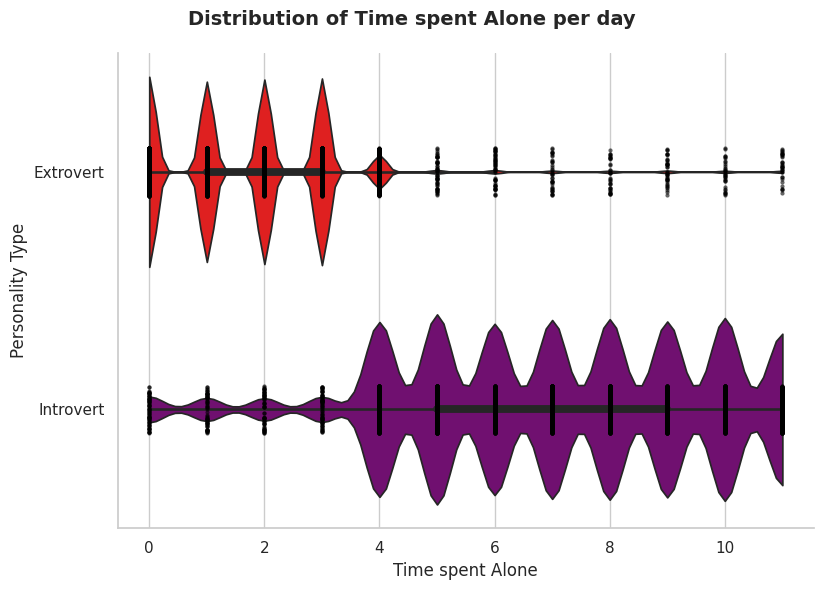

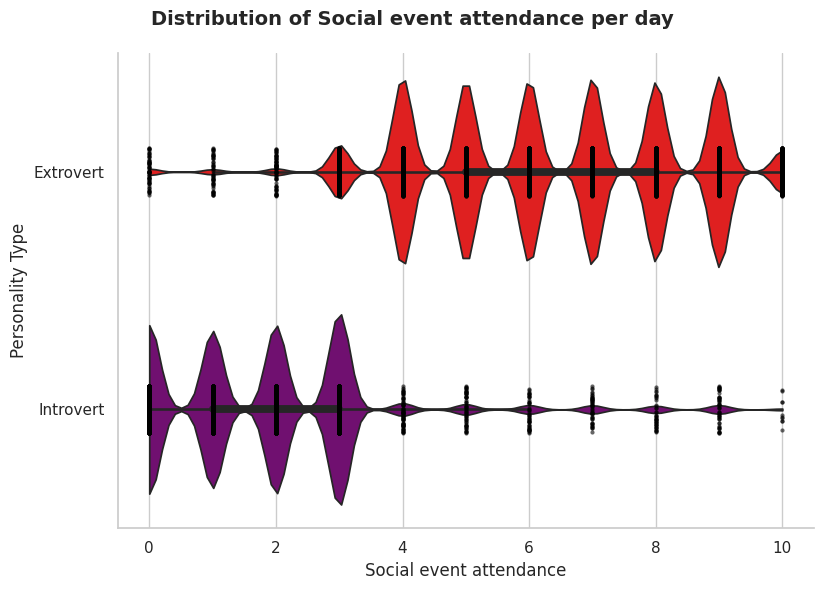

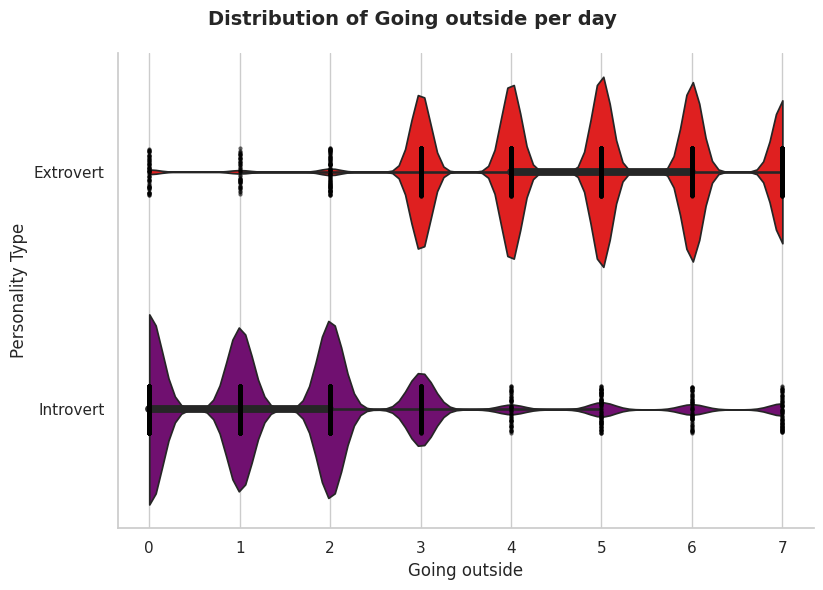

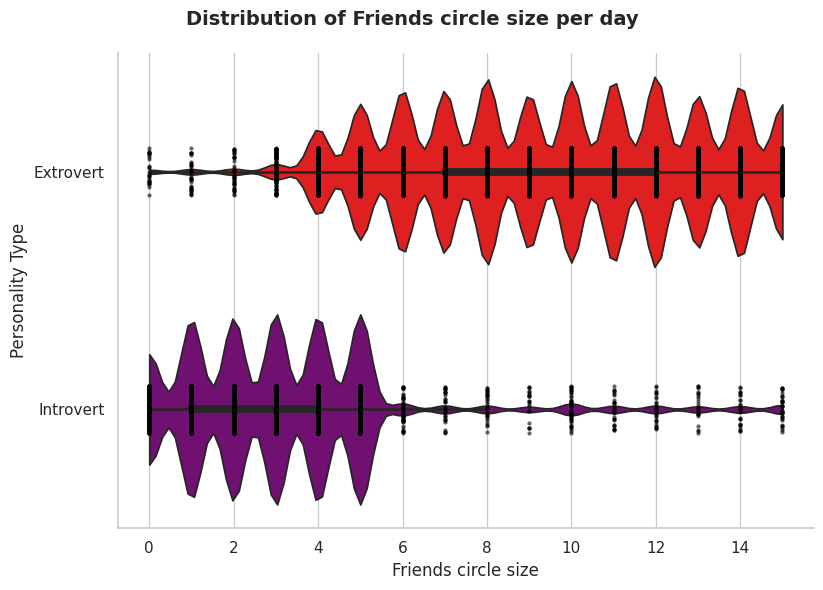

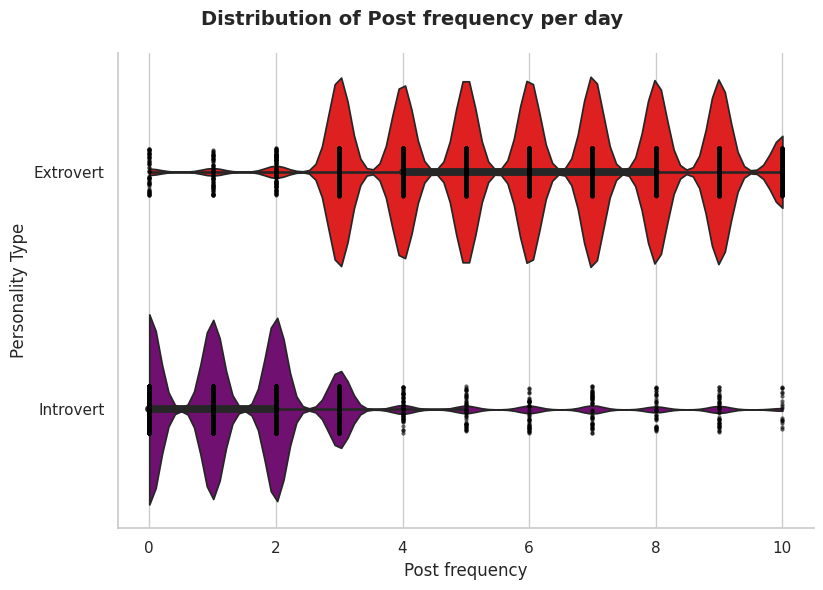

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Let s make and a vilion plot for every continuous data
def violin(df,columns:list):
    for col in columns:
        sns.set_theme(style="whitegrid")
        # create a vilion plot
        g = sns.catplot(
            data=df,
            x=col,
            y='Personality',
            kind='violin',
            palette={'Introvert': 'purple', 'Extrovert': 'red'},
            bw_adjust=0.5,
            cut=0,
            height=6,
            aspect=1.4
        )

        # Overlay individual data points
        sns.stripplot(
            data=df,
            x=col,
            y='Personality',
            color='black',
            size=3,
            alpha=0.6,
            jitter=True,
            ax=g.ax
        )

        # Title and labels
        g.set_axis_labels(f"{col.replace('_',' ')}", "Personality Type")
        g.fig.suptitle(f"Distribution of {col.replace('_',' ')} per day", fontsize=14, weight='bold')
        plt.tight_layout()
        plt.show()

violin(df,col_plot)

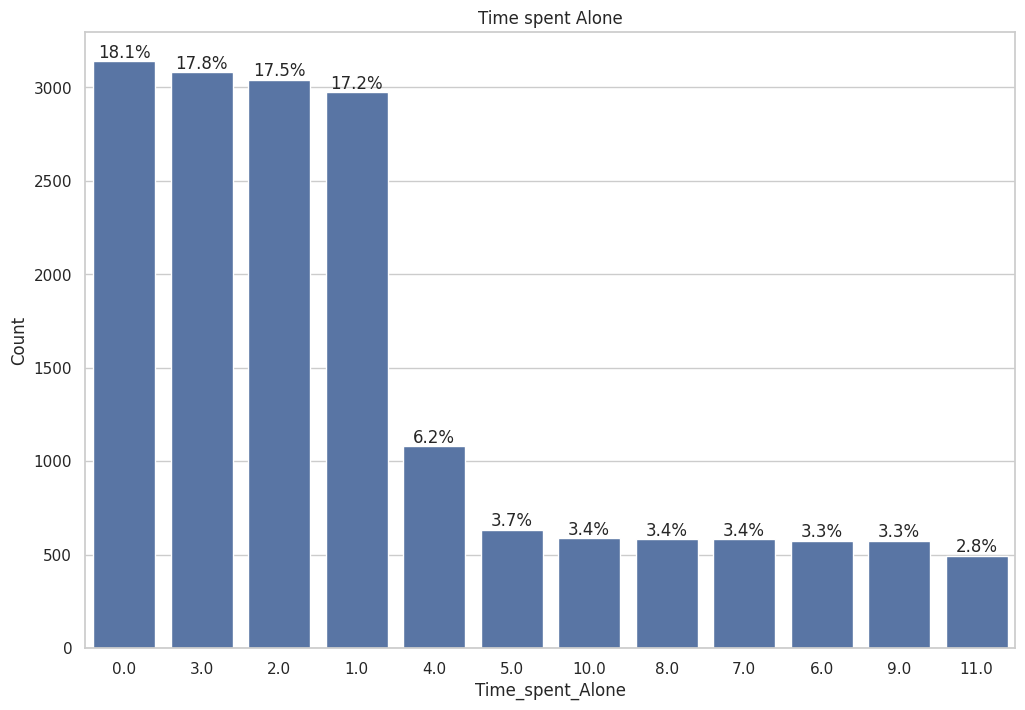

In [18]:
plt.figure(figsize=(12,8))

ax = sns.countplot(data=df, x='Time_spent_Alone', order=df['Time_spent_Alone'].value_counts().index)
# get the total count of the type column
total = df['Time_spent_Alone'].count()

# annotate the bars with fmt from matplotlib v3.7.0
for c in ax.containers: # container object is just a list and when we create a plot algorithm put that plot in .container
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

ax.set(xlabel='Time_spent_Alone', ylabel='Count', title='Time spent Alone')
plt.tight_layout
plt.show()

# Correlation Matrix of numeric features

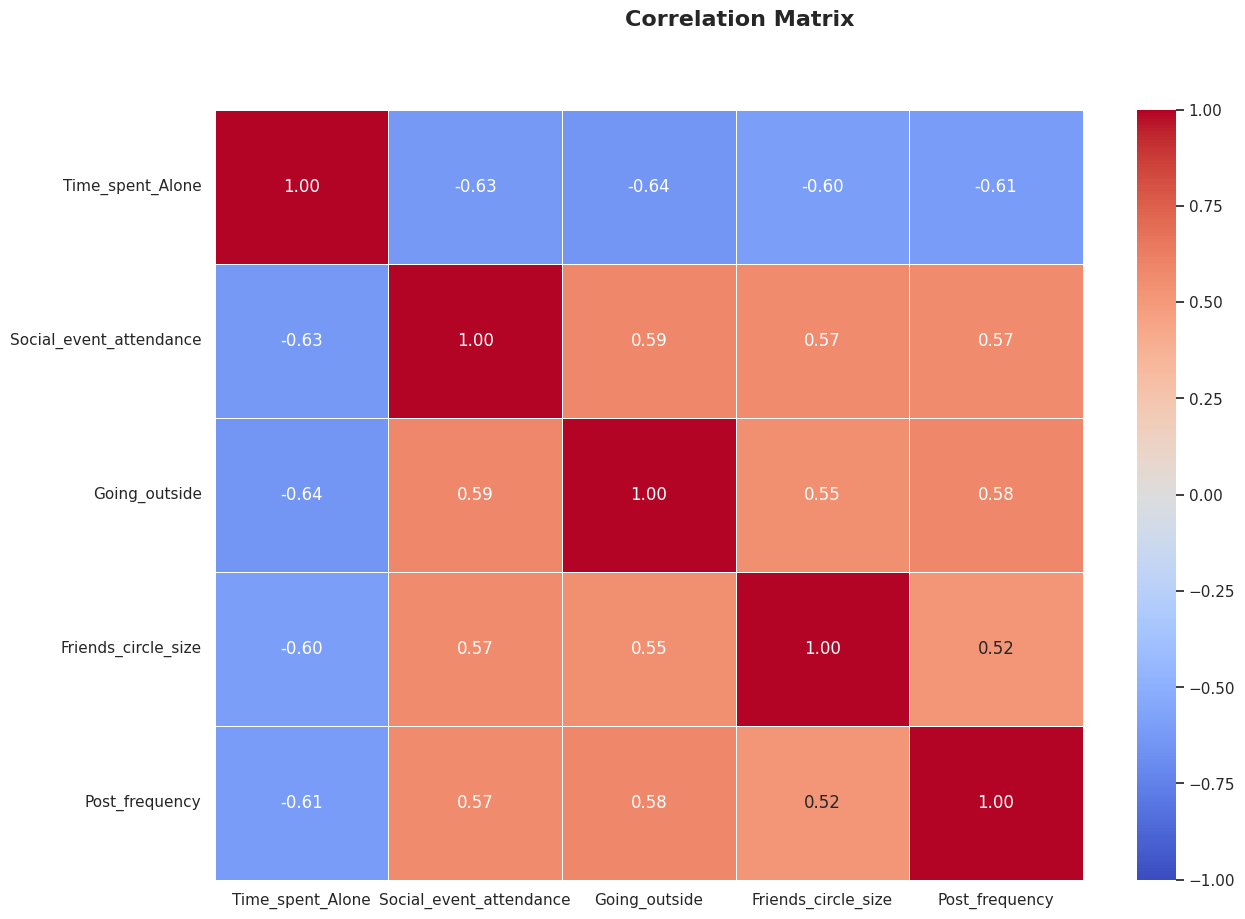

In [24]:
plt.figure(figsize=(14,10))
corr=df[col_plot].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, fmt=',.2f', vmax=1, vmin=-1, center=0)
plt.suptitle('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

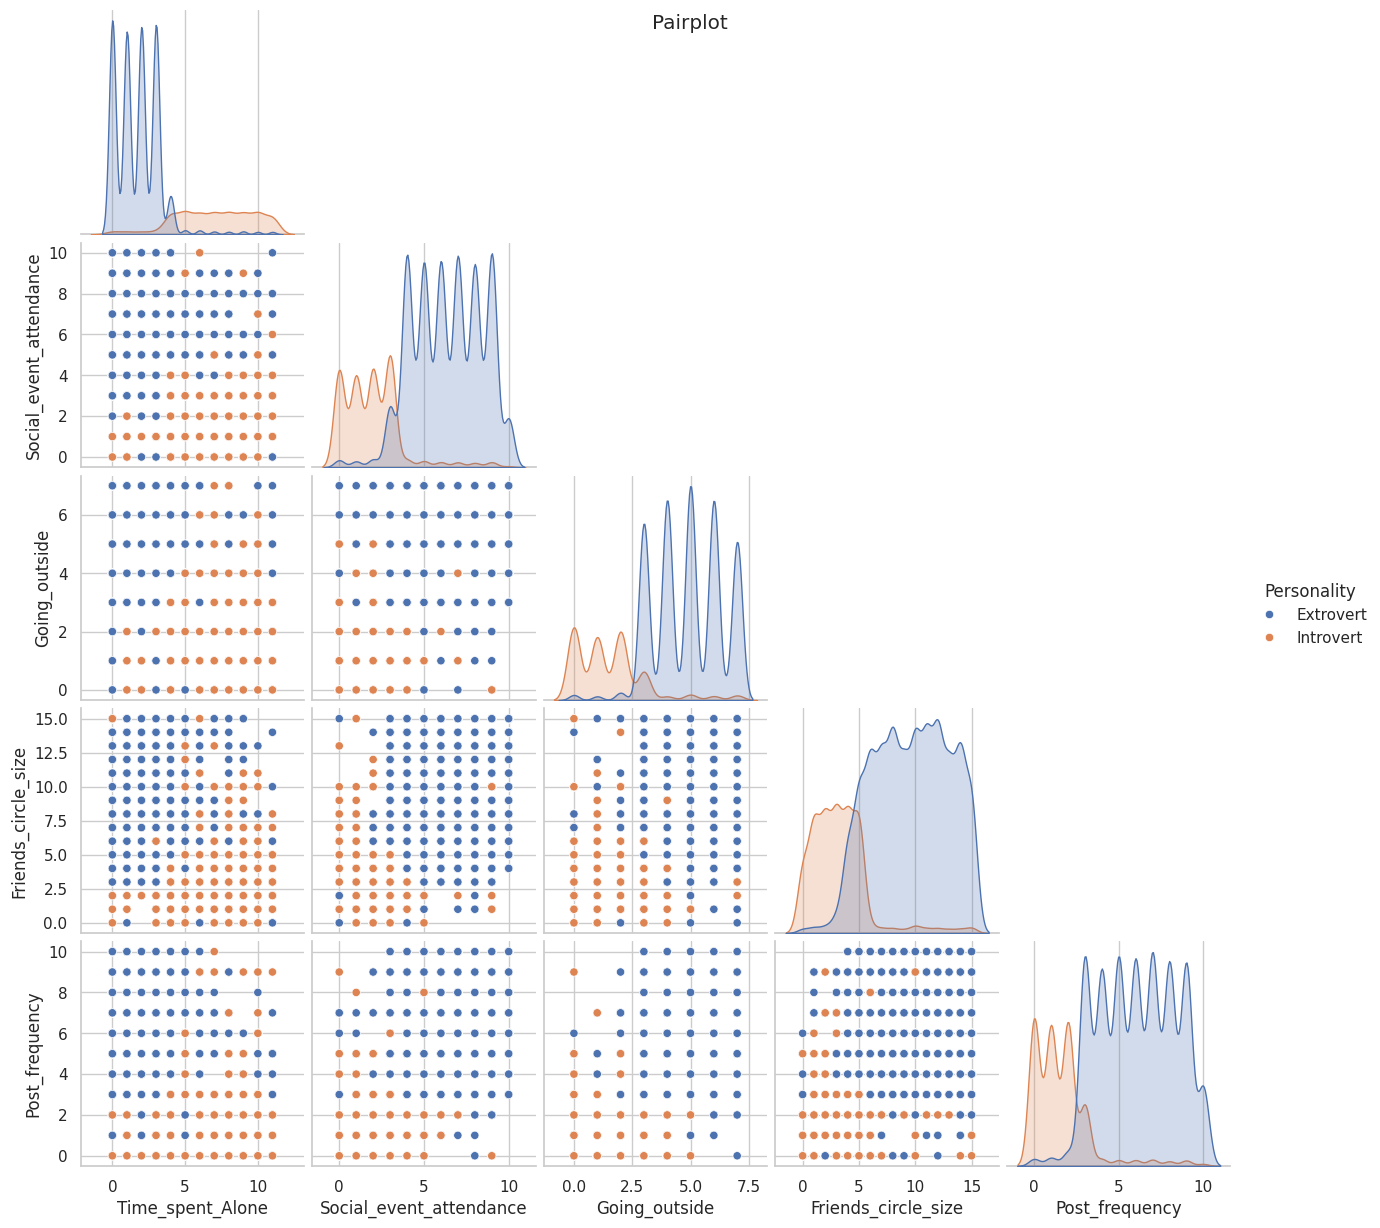

In [32]:
# Visualizing pairplot of numerical columns
sns.pairplot(df[['Time_spent_Alone', 'Social_event_attendance','Going_outside','Friends_circle_size',
                 'Post_frequency','Personality']], hue = 'Personality', corner = True)
plt.suptitle('Pairplot')
plt.show()